In [1]:
!pip install pyarrow 

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_parquet('yellow_tripdata_2023-01.parquet')
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
print('Nombre de lignes est : ',data.shape[0])
print('Nombre de colonnes est : ',data.shape[1])

Nombre de lignes est :  3066766
Nombre de colonnes est :  19


In [5]:
data.describe() # la fonction describe calcule la moyenne, les quartiles, l'écart-type ... de chaque variable 

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
std,4.438480e-01,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00


In [6]:
print(data.info()) # le type de chaque variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
data.isna() # vérifier s'il y a des valeurs manquantes 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True
3066762,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True
3066763,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True
3066764,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True


In [8]:
missing_values = data.isnull().sum() # calculer la somme des valeurs manquantes 
print(missing_values) 

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64


In [9]:
data = data.dropna() # supprimer les valeurs manquantes 
data 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995018,1,2023-01-31 23:00:19,2023-02-01 00:08:33,1.0,13.90,99.0,N,228,159,1,50.5,0.00,0.5,0.00,0.0,1.0,52.00,0.0,0.00
2995019,2,2023-01-31 23:14:38,2023-01-31 23:25:30,1.0,3.37,1.0,N,263,107,1,15.6,1.00,0.5,2.00,0.0,1.0,22.60,2.5,0.00
2995020,2,2023-01-31 23:44:51,2023-01-31 23:58:45,1.0,2.86,1.0,N,79,246,1,16.3,1.00,0.5,2.00,0.0,1.0,23.30,2.5,0.00
2995021,1,2023-01-31 23:45:00,2023-01-31 23:55:46,2.0,3.80,1.0,N,68,238,1,17.7,3.50,0.5,2.50,0.0,1.0,25.20,2.5,0.00


In [10]:
# Encodage des variables catégorielles dans notre jeu de donnée la variable 'store_and_fwd_flag' 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
variables = ["store_and_fwd_flag"]  # Ajoutez ici les noms des variables que vous souhaitez encoder

for var in variables:
    data[var] = le.fit_transform(data[var])
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,0,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,0,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,0,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,0,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,0,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995018,1,2023-01-31 23:00:19,2023-02-01 00:08:33,1.0,13.90,99.0,0,228,159,1,50.5,0.00,0.5,0.00,0.0,1.0,52.00,0.0,0.00
2995019,2,2023-01-31 23:14:38,2023-01-31 23:25:30,1.0,3.37,1.0,0,263,107,1,15.6,1.00,0.5,2.00,0.0,1.0,22.60,2.5,0.00
2995020,2,2023-01-31 23:44:51,2023-01-31 23:58:45,1.0,2.86,1.0,0,79,246,1,16.3,1.00,0.5,2.00,0.0,1.0,23.30,2.5,0.00
2995021,1,2023-01-31 23:45:00,2023-01-31 23:55:46,2.0,3.80,1.0,0,68,238,1,17.7,3.50,0.5,2.50,0.0,1.0,25.20,2.5,0.00


In [12]:
# supprimer des colonnes pas nécessaires
data = data.drop(["extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount"], axis=1)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,0,161,141,2,9.3,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,0,43,237,1,7.9,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,0,48,238,1,14.9,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,0,138,7,1,12.1,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,0,107,79,1,11.4,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995018,1,2023-01-31 23:00:19,2023-02-01 00:08:33,1.0,13.90,99.0,0,228,159,1,50.5,0.0,0.00
2995019,2,2023-01-31 23:14:38,2023-01-31 23:25:30,1.0,3.37,1.0,0,263,107,1,15.6,2.5,0.00
2995020,2,2023-01-31 23:44:51,2023-01-31 23:58:45,1.0,2.86,1.0,0,79,246,1,16.3,2.5,0.00
2995021,1,2023-01-31 23:45:00,2023-01-31 23:55:46,2.0,3.80,1.0,0,68,238,1,17.7,2.5,0.00


In [13]:
# voir le nom des colonnes 
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [14]:
#grouper  par type de payement
data.groupby(['payment_type']).mean()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,congestion_surcharge,airport_fee
payment_type,,,,,,,,,,
1,1.730473,1.353817,3.435008,1.599445,0.006584,167.288294,165.627249,18.660045,2.348830,0.102283
2,1.736969,1.412069,3.519416,1.066536,0.007036,163.074299,159.847456,18.082795,2.111093,0.137351
3,1.502691,1.226932,2.105391,1.224879,0.017700,161.266215,159.209677,8.113290,0.921878,0.075043
4,1.885966,1.275280,2.912597,1.145268,0.001862,161.597982,156.953539,1.954440,0.211280,0.017494


In [15]:
# grouper pra type de payement et par code tarifaire
data.groupby(['payment_type','RatecodeID']).mean()

VendorID  passenger_count  trip_distance  \
payment_type RatecodeID                                             
1            1.0         1.731969         1.348732       2.759959   
             2.0         1.778327         1.491855      18.021766   
             3.0         1.774142         1.588827      19.372822   
             4.0         1.784536         1.372165      20.536722   
             5.0         1.840987         1.532981       5.551696   
             6.0         1.000000         1.000000       0.000000   
             99.0        1.000000         0.998626       6.844461   
2            1.0         1.733888         1.400602       2.794144   
             2.0         1.794864         1.640073      15.931680   
             3.0         1.848876         1.815399      13.386413   
             4.0         1.765251         1.456371      66.457220   
             5.0         1.792110         1.522229       8.266713   
             6.0         1.000000         1.000000       0.000000   
             99.0        2.000000         1.000000       0.000000   
3            1.0         1.495380         1.212948       1.787527   
             2.0         1.656716         1.398010       5.960557   
             3.0         1.460938         1.414062       4.563906   
             4.0         1.240000         1.240000      10.363200   
             5.0         1.486141         1.262260       2.651301   
             6.0         1.000000         0.250000       1.600000   
             99.0        1.000000         0.000000       0.000000   
4            1.0         1.886956         1.249541       2.566525   
             2.0         1.906181         1.532561       7.225486   
             3.0         1.841040         1.765896       5.130607   
             4.0         1.810811         1.621622      19.771892   
             5.0         1.800000         1.498000       3.134840   

                         store_and_fwd_flag  PULocationID  DOLocationID  \
payment_type RatecodeID                                                   
1            1.0                   0.006778    168.649929    166.451746   
             2.0                   0.003143    141.237600    155.050328   
             3.0                   0.001437    160.795211     31.614206   
             4.0                   0.003780    140.050172    251.166667   
             5.0                   0.004969    158.608720    175.850365   
             6.0                   0.000000    236.000000    236.000000   
             99.0                  0.001145    127.384075    130.293839   
2            1.0                   0.006867    163.929467    160.170362   
             2.0                   0.008045    144.683288    153.229561   
             3.0                   0.009087    159.655667     77.581540   
             4.0                   0.013900    139.932819    245.792278   
             5.0                   0.039449    154.045085    181.380714   
             6.0                   0.000000    161.000000    161.000000   
             99.0                  0.000000    233.000000    233.000000   
3            1.0                   0.017063    162.253480    159.673648   
             2.0                   0.012935    152.893532    157.851741   
             3.0                   0.031250    155.078125    128.980469   
             4.0                   0.060000    131.960000    204.140000   
             5.0                   0.029851    150.899787    156.547974   
             6.0                   0.000000    171.500000    171.500000   
             99.0                  0.800000    212.800000    264.000000   
4            1.0                   0.001736    162.292846    156.992138   
             2.0                   0.001104    152.198124    152.360375   
             3.0                   0.000000    158.569364    133.101156   
             4.0                   0.009009    141.909910    247.666667   
             5.0                   0.012000    159.704000    167.61

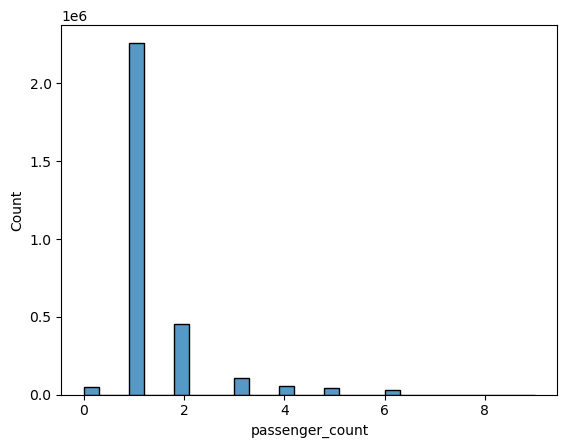

In [16]:
# affiche la distribution du nombres de passagers
sns.histplot(data["passenger_count"], bins=30, kde=False)
plt.show()

<AxesSubplot:>

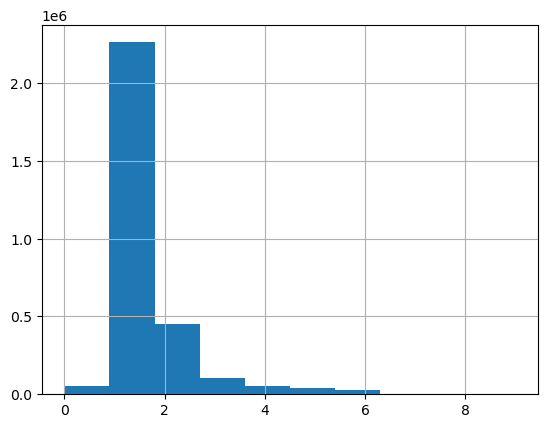

In [17]:
# autre affichage 
data["passenger_count"].hist()

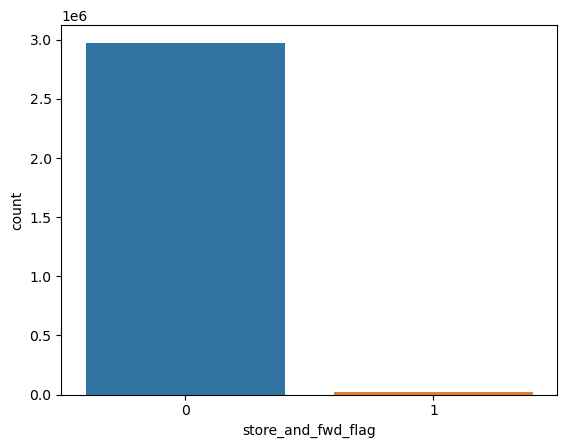

In [18]:
#affiche la distribution du stockage et transmition du trajet
sns.countplot(x ="store_and_fwd_flag", data = data)
plt.show()

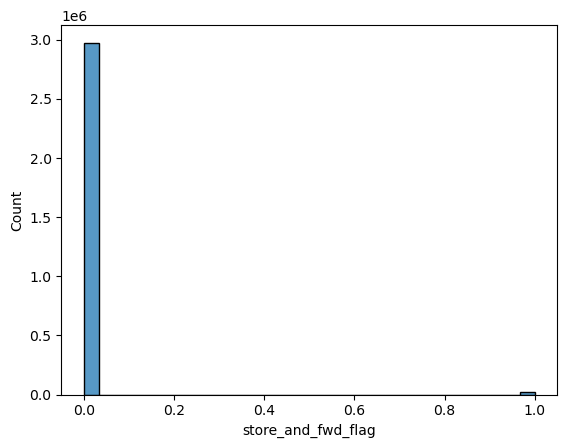

In [19]:
#affiche la distribution du stockage et transmition du trajet
sns.histplot(data["store_and_fwd_flag"], bins=30, kde=False)
plt.show()

<AxesSubplot:>

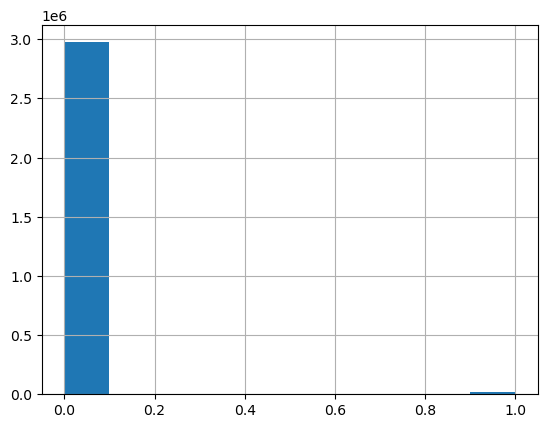

In [20]:
# autre affichage 
data["store_and_fwd_flag"].hist()

<AxesSubplot:>

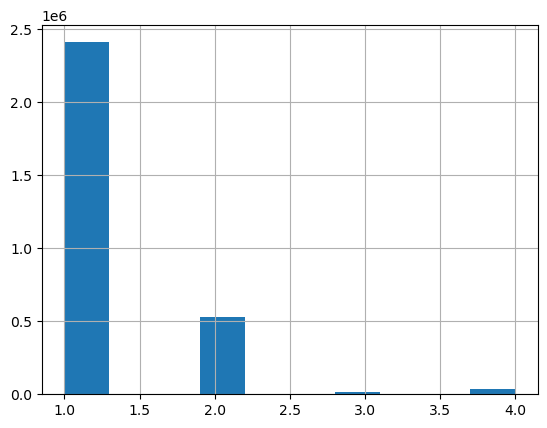

In [25]:
#affiche la distribution du type de payement
#1= Carte de crédit
#2= Espèces
#3= Sans frais
#4= Litige
#5= Inconnu
#6= Voyage annulé
#affiche la distribution du type de payement
data["payment_type"].hist()

In [26]:
# voir les différentes valeurs d'une variable 
set(data['VendorID'])

{1, 2}

In [27]:
set(data["RatecodeID"])

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0}

<AxesSubplot:>

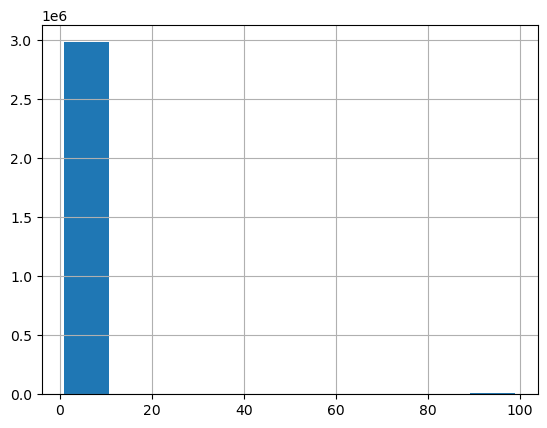

In [28]:
#affiche la distribution du code tarifaire final 
#1= Tarif normal
#2=JFK
#3=Newark
#4=Nassau ou Westchester
#5=Tarif négocié
#6=Voyage en groupe
data["RatecodeID"].hist()

In [30]:
data['congestion_surcharge'].unique()

array([ 2.5,  0. , -2.5])

In [31]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format="%Y-%m-%d  %H:%M:%S")
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format="%Y-%m-%d  %H:%M:%S")

In [32]:
data['seconde']=data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']
data['seconde']

0         0 days 00:08:26
1         0 days 00:06:19
2         0 days 00:12:45
3         0 days 00:09:37
4         0 days 00:10:50
                ...      
2995018   0 days 01:08:14
2995019   0 days 00:10:52
2995020   0 days 00:13:54
2995021   0 days 00:10:46
2995022   0 days 00:03:37
Name: seconde, Length: 2995023, dtype: timedelta64[ns]

In [33]:
from datetime import timedelta
def seconder(x):
    mins, secs, millis = map(float, x.split(':'))
    td = timedelta(minutes=mins, seconds=secs, milliseconds=millis)
    return td.total_seconds()

data['secondes'] = data['seconde'].apply(seconder)

AttributeError: 'Timedelta' object has no attribute 'split'

In [34]:
train=data.sample(frac=0.7,random_state=1)
test=data.loc[~data.index.isin(train.index)]
print(train.shape)
print(test.shape)

(2096516, 14)
(898507, 14)


In [35]:
model=LinearRegression()
model.fit(train[y1], train[x1])

NameError: name 'y1' is not defined